# ESC180 Unofficial Final Exam review

This tutorial is for the [ESC180: Intro to Programming](http://www.cs.toronto.edu/~guerzhoy/180/) final exam at the University of Toronto's Engineering Science program. 

The following is an interactive python notebook document ("Jupyter Notebook").
If you haven't already worked with Jupyter notebooks:

- For an intro on how to use google colab, click [here](https://colab.research.google.com/?utm_source=scs-index#)
- For some examples, check out this example notebook [here](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb#scrollTo=0vJLt3JRL9eR)


We will be covering the following student-requested topics:

1. Variable Scoping
2. Recursion
3. Time Complexity

This tutorial is prepared for the Fall 2021 offering of ESC180 by Brian Chen `brianchen.chen [at] mail.utoronto.ca`.

## Things I recommend reviewing

- Variable Scoping. See: [LEGB Rule](https://realpython.com/python-scope-legb-rule/). 
    - Useful for questions that ask: "Given the following piece of code, what is the output?"  
- Common errors, e.g. index out of range, division by zero, KeyError and *when they occur*
- Practice!
    - You have access to a bunch of past exams. Give them an honest attempt with pencil and paper, then verify your solutions with a python interpreter. It is important that you genuinely *try* to solve the problems and work through whatever mistakes you do end up making; that is the best way to learn.
    - Pretend like you're a debugger. Draw out your 'workspace' with all the variables and continously update it as you 'step' through the code. This is especially useful for the questions that ask you what the output of a function will be





# Recursion
Recursion is a powerful tool for describing behaviour where the defined behaviour is defined with respect to itself. For example: the set of (your ancestors) is equal to the set of (your parents + your parents ancestors). Generally in programming recursion is just a function that calls itself. In ESC180 you will be (with some exceptions) using recursion to operate on linear structures in lieu of `for` or `while` loops; you will deal with tree or graph-like data structures (which you will encounter in ESC190).

The general approach for solving a recursive problem is as follows
- Figure out what your approach is. Follow your intuition. This is probably the trickiest part of recursion and it largely comes with practice. 
    - This is more clear in the following examples
- Define your base case
- Make the leap of faith and make the recursive call

If things aren't working, ask yourself:
- Have I adequately broken the problem down?
    - Do the base cases make sense?
    - Am I making recursive calls the right way such that we do reach a base case?
- What does the call graph look like? Is that what I expect?

Below I will go over two examples; one from a past final and another a common programming problem involving working with 2D arrays and recursion.

## Resources:

- Guerzhoy's [notebook](http://www.cs.toronto.edu/~guerzhoy/180/lec/W12/calltrees.html) on calltrees is a good reference for what you may encounter
- ["The Master Method"](https://www.cs.cornell.edu/courses/cs3110/2012sp/lectures/lec20-master/lec20.html) for recursion is a general "cookbook" recipe for solving recursion. Also, [wikipedia](https://en.wikipedia.org/wiki/Master_theorem_(analysis_of_algorithms)) link
- [VisuAlgo](https://visualgo.net/en/recursion) is a great way to visualize recursion. There are some examples built in that you can select from:


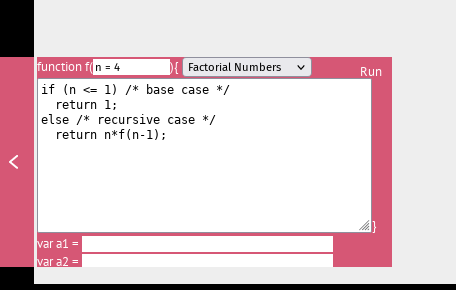



In [ ]:
# Example: Using recursion instead of loops to count down to 0 from 10
for i in range(0, 10, -1):
    print(f"Iterative: {i}")

def rec_for(n):
    # Approach: decremement parameter during recursion
    if n == 0: # identify base case
        return
    # do something here
    print(f"Recursive: {n}")
    rec_for(n-1) # if not base case, make recursive call

rec_for(10)

# A useful technique for turning for-loops into recursive varients is to add a "counter" parameter.
# For example, if we were to print out value in the list L = [1,2,3], multiplied by two, we could:

L = [1,2,3]
for i in range(len(L)):
    L[i] *= 2
print(f"Iterative: {L}") 


# Or, with recursion:
def rec_list(L, n):
    # identify base case: n = 0
    if n == 0:
        return
    else:
        L[n-1] *= 2
    rec_list(L, n-1)

L = [1,2,3]
rec_list(L, len(L))
print(f"Recursive: {L}")


Recursive: 10
Recursive: 9
Recursive: 8
Recursive: 7
Recursive: 6
Recursive: 5
Recursive: 4
Recursive: 3
Recursive: 2
Recursive: 1
Iterative: [2, 4, 6]
Recursive: [2, 4, 6]


In [ ]:
# A good example is the recursive merging of two sorted lists, from the 2015 final exam
def merge(L1, L2):
    """ merge is a recursive function that takes two lists L1, L2 sorted in 
    increasing order and returns a sorted list L that contains the
    elements of L1 and L2"""

    # Identify approach: Traverse L1, L2, building L by popping off the first 
    # values of L1, L2 based off a comparison between the first elements

    # Identify the base case: 
    #   Assuming we are removing elements from L1 and L2
    #       When L1 and L2 are empty --> we are done
    #       If either L1 or L2 are empty --> we just need to concatenate
    #           the return list with the the remaining non-empty list

    # as a note, an empty list evaluates to False so we could replace the below 
    # line with `if not L1 or not L2:`
    if (len(L1) == 0) and (len(L2)) == 0:
        return []
    if not L1:
        return [L2[0]] + merge(L1, L2[1:])
    if not L2:
        return [L1[0]] + merge(L1[1:], L2)

    # We need to then make the recursive call
    # Assuming that our base cases work, let's make the "leap of faith" based
    # off our initial approach
    if L1[0] > L2[0]: # compare the leading elements
        return [L2[0]] + merge(L1, L2[1:]) # ... and make recursive call 
    return [L1[0]] + merge(L1[1:], L2)

    

L1 = [1,2,3]
L2 = [2,4,6,7]
merged = merge(L1, L2)

print(f"L1: {L1}\nL2: {L2}\nmerged:{merged}")

# Follow up questions: 
#       1. Draw out the call graph for this function
#           1a. What about the variables? How do they change as I run this function?
#       2. What is the time complexity?


L1: [1, 2, 3]
L2: [2, 4, 6, 7]
merged:[1, 2, 2, 3, 4, 6, 7]


In [ ]:
# Another example: Flood fill: https://en.wikipedia.org/wiki/Flood_fill
# Think of this as the "bucket" tool in Paint
# Given a 2D grid filled with 0-s and 9-s and an initial point `(i, j)`
# Starting from (i, j), write a function `flood_fill` that will
# fill in the area around it enclosed by the edges of the grid and 9s.


# Example: (Here, 0s are written as _ for ease of reading)

# i=  0,1,2,3,4,5,6
# j
# 0 [[_,_,_,_,9,_,_],
# 1  [_,_,_,9,_,9,_],
# 2  [9,9,9,_,_,9,9],
# 3  [_,_,9,_,_,9,_],
# 4  [_,_,9,9,9,9,_],
# 5  [_,_,_,_,_,9,_]]


# after a flood fill starting from location (4, 2)...
# [[_,_,_,_,9,_,_],
#  [_,_,_,9,1,9,_],
#  [9,9,9,1,1,9,9],
#  [_,_,9,1,1,9,_],
#  [_,_,9,9,9,9,_],
#  [_,_,_,_,_,9,_]]


input =[[0,0,0,0,9,0,0],
        [0,0,0,9,0,9,0],
        [9,9,9,0,0,9,9],
        [0,0,9,0,0,9,0],
        [0,0,9,9,9,9,0],
        [0,0,0,0,0,9,0]]


# ignore this -- it's just for having nicer output when you run this example
class colors:
    GREEN = '\033[92m'
    RED = '\033[31m'
    ENDC = '\033[0m'

def pretty_print(grid):
    """Pretty prints for your convenience"""
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            v = grid[i][j]
            if v != 0:
                col = colors.RED if v == 9 else colors.GREEN 
                print(f"{col}{v}{colors.ENDC}", end='')
            else:
                print(v, end='')
        print('')
    print('')



# Solution:
# First, note that we can deal with the (quite literally) edge case by padding the edges of the matrix with 9s
# Here, I will use numpy out of convenience. As an exercise, how could you do this with just list processing and loops?

import numpy as np
grid = np.pad(np.array(input), 1, mode="constant", constant_values=9)
print("initial grid")
pretty_print(grid)

def flood_fill(grid, i, j):
    # Identify approach: Move along the 2D array. At each point, set it to 1 
    # if it hasn't been visited before (i.e. it hasn't already been set to 1)
    # If we encounter an edge or an 9, don't do anything

    if grid[j][i] in (9, 1): # Base case: 9 (boundary) 1 (already visited)
        return 

    grid[j][i] = 1 # perform action
    # pretty_print(grid)    # uncomment if you want to see it flood step-by-step

    # Recursive step: apply this again to neighbouring cells
    flood_fill(grid, i-1, j)
    flood_fill(grid, i+1, j)
    flood_fill(grid, i, j-1)
    flood_fill(grid, i, j+1)



# Note that we padded i, j!
# You can either just remember to add 1 to the indicies you want the initial 
# point to be at, change the value getting logic in the flood_fill function
# or just wrap it like i do here


def flood_fill_wrapped(grid, i, j):
    flood_fill(grid, i+1, j+1)

flood_fill_wrapped(grid, 5, 0)
print("Output grid for initial point (5,0)")
pretty_print(grid)

flood_fill_wrapped(grid, 0, 4)
print("And again, for (0,4)")
pretty_print(grid)


# Bonus exercise: Find the size of every enclosed area
#   For example, the size of the area enclosing point (0, 4) is 9
# If you enjoyed this exercise, try this: https://adventofcode.com/2021/day/9

initial grid
999999999
900009009
900090909
999900999
900900909
900999909
900000909
999999999

Output grid for initial point (5,0)
999999999
900009119
900090919
999900999
900900909
900999909
900000909
999999999

And again, for (0,4)
999999999
900009119
900090919
999900999
911900909
911999909
911111909
999999999



# Time Complexity

Time complexity $\mathcal{O}(f(n))$is a heurstic for how long it will take a function to run, usually as a function of input size $f(n)$. 
We can estimate this by counting the number of elementary operations we perform on the input, where an elementary operation is something that is assumed to take constant time and is the "time consuming" or "important" action being done by the code.

Looking at past finals, you can generally expect two types of questions:
1. Write a function that will run in a given time complexity
2. Given a function (or chunk of code), what is it's worst-case runtime complexity?


###  1) Write a function that will run in a given time complexity
You should know the common time complexities of common algorithms covered in class, e.x.

- Iterating over a list, or finding an element in an unsorted list: $\mathcal{O}(n)$, where $n$ is the length of the list
- Binary search, or finding an element in a sorted list $\mathcal{O}(log(n))$
- Accessing an item in a list or dict: $\mathcal{O}(1)$
- Sorting a list, optimized: $\mathcal{O}(n\log{n})$ 
- Sorting a list, non-optimized e.g. bubblesort: $\mathcal{O}(n^2)$
- Permutations and Combinations: $\mathcal{O}(n!)$

**NOTE** List sorting can have very different complexities depending on the algorithm used. Generally most optimized sorts it is $\mathcal{O}(n\log{n})$

I will not be listing everything out; there are much prettier tables on the internet that do so. For example:
- [bigocheatsheet.com](https://www.bigocheatsheet.com/)
- [wikipedia](https://en.wikipedia.org/wiki/Time_complexity)

A little bit of a "cheat" for this kind of problem is to "compose" functions in order to make them run in a desired time complexity. For example:

```python
# EX1: write a recursive function that will run in O(nlogn):
def o_N(n):
    if n == 0:
        return
    o_N(n-1)

def o_NlogN(n):
    o_N(n) # "compose" the functions together so that we get a nlogn function
    if n == 0:
        return
    o_N(n//2)
```



### 2) Finding the time complexity of a function
For this, there is no secret other than practice. But there's a few important tips I can give for you to keep in mind while doing these problems:

1. Mind early/late exits

For example, the following code actually executes in $\mathcal{O}(1)$, not $\mathcal{O}(n^2)$ time despite what the 2 for-loops suggest
```python
def foo(n):
    for i in range(n):
        for j in range(n):
            if i == 1:
                return
```
... and it may not always be as obvious as it was here (See: 2016 Final Q7)

2. When inspecting iterations -- be careful of what you're iterating over

A good example of this is ESC180 [Project 3](http://www.cs.toronto.edu/~guerzhoy/180/proj/proj3/p3.pdf), subpart b)

Example:

1. Determine whether the worst-case runtime complexity of the following function is bounded by $\mathcal{O}(n^2)$.
2. What will its typical runtime complexity be?

```python
# The pseudocode is as follows:
def f(sentences):
    for s in sentences:
        for w1 in s:
            for w2 in s:
                ... update dict ...
```
where `sentences` is a list of sentences taken from a large text.

    1. Find elementary operation

Here the elementary operation is updating the dict

    2. Analyze loops

Do some "napkin math". 
Let $L$ be the average sentence length.

We know that the outer loop will run $\frac{n}{L}$ times, as we are iterating over the sentences in the text.

But what about the inner two loops?

Note that they do not iterate over the words of the text or the sentences; but rather the *words in the sentence*. Therefore the complexity of the two inner loops will be $L^2$. So, our total complexity will be $~\frac{n}{L}*L^2 = nL$  which is lesser than $n^2$ for $L < n$, which answers the questions above.


##  Remarks
Ultimately the best thing to do is to review a bunch of time complexity problems in order to build up an intuition about it.

From past exams, I recommend doing the following:
- 2020 q3
- 2016 q{1, 7}
- 2014 q9

If you have questions, either e-mail me or we can discuss it during office hours.

As bonus content, see [this](https://www.geeksforgeeks.org/difference-between-big-oh-big-omega-and-big-theta/) for more on time complexity
This [relevant xkcd](https://xkcd.com/1185/), and my [favourite sorting algo](http://wiki.c2.com/?QuantumBogoSort)








# Combinations and Permutations

In real life, we would use [this](https://docs.python.org/3/library/itertools.html).
However, this is ESC180. 

I didn't get requests for this section, but I figured it would be prudent to leave a few resources

1. Generating combinations:
TLDR: break this down into a recursive problem. For example:

```
comb({ 1 2 3 4 5 }, 3) =
{ 1, comb({ 2 3 4 5 }, 2) } and
{ 2, comb({ 3 4 5 }, 2) } and
{ 3, comb({ 4 5 }, 2) }
```
You can see how this becomes *really* big, *really* fast!
[Rosetta code example](https://rosettacode.org/wiki/Combinations#Python)


2. Generating permutations: [Heap's algorithm](https://en.wikipedia.org/wiki/Heap%27s_algorithm), [Rosetta code example](https://rosettacode.org/wiki/Permutations#Python)



Try: 2020 Q4, Q5 (challenge)

# Practice Problems
The following are a few practice problems I either came up with, adapted off the internet, or from past final exams. 
The solutions will be provided, however, I encourage you to try solving them by yourself first -- and don't hesitate to contact me if you have any questions!
If you have a good solution, let me know so that I can include them in future versions of this tutorial.

A few are from [Advent of Code 2021](https://adventofcode.com/2021), which I have been doing for fun and realized that they all make for great ESC180 practice problems. Do note that this will require you to make an account.If you have some spare time, I highly encourage you to give it a shot.

1. More flood fill: [https://adventofcode.com/2021/day/9](https://adventofcode.com/2021/day/9)
2. Given a string of braces, e.g. "{{}[()}{{", determine if a) can you make it balanced by appending a sequence of closing brackets to it?, and b) if so, what would that sequence be?
    1. Example: '{}{{}}[{((][` would be completed by "]))}" 
3. Turning integers into roman numerals: [https://leetcode.com/problems/integer-to-roman/](https://leetcode.com/problems/integer-to-roman/)
4. [Lanternfish](https://adventofcode.com/2021/day/6) Hint: Histogram
5. Given a 5x5 bingo board with random numbers between 1 and 100 i.e.
[[11,22,31,4,74],
[64,72,85,9,11]
...
]
and a list of numbers L, i.e. [5, 6, 32, 55...],

If we were to pop off the first element of L every turn and "call" it, how many turns will it take for the bingo card to "win"?

You will have to write your own code to represent and build a bingo card, generate the call list, and to check if the bingo card is in a win state or not.